In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import h5py as h5

import os
import torch

## Load Data

In [11]:
f = h5.File("data/1.mat", 'r')
f.items()

ItemsViewHDF5(<HDF5 file "1.mat" (mode r+)>)

In [ ]:
data = f.get('')

In [57]:
from scipy.io import loadmat
images = loadmat("brainTumorData/1.mat")
# NotImplementedError: Please use HDF reader for matlab v7.3 files

In [15]:
!pip install mat73

  Created wheel for mat73: filename=mat73-0.40-cp37-none-any.whl size=4051 sha256=4bc3d58d5a511f3e491f15cdef956fda7fe015a1d521d0629f28701db61d1cc9
  Stored in directory: /Users/test/Library/Caches/pip/wheels/e4/72/fb/5f606ad9663eb5f4546d8263feb4314cbfd76f70b1d1a0ee21
Successfully built mat73


In [16]:
import mat73
data_dict = mat73.loadmat('brainTumorData/1.mat')

In [17]:
data_dict

{'cjdata': {'PID': '100360', 'image': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'label': array(1.), 'tumorBorder': array([267.61524501, 231.37568058, 277.83666062, 248.10163339,
         289.91651543, 250.8892922 , 305.71324864, 253.676951  ,
         318.72232305, 249.9600726 , 321.50998185, 237.88021779,
         354.96188748, 234.16333938, 367.97096189, 227.65880218,
         380.9800363 , 210.93284936, 372.61705989, 195.13611615,
         363.32486388, 177.48094374, 350.31578947, 176.55172414,
         336.37749546, 183.98548094, 317.79310345, 196.06533575,
         305.71324864, 207.21597096, 295.49183303, 217.43738657,
         288.98729583, 222.08348457, 273.19056261, 223.94192377,
         268.54446461, 228.58802178]), 'tumorMask': array([[False, False, False, ..., False, False, False],
     

In [28]:
list(data_dict.keys())

['cjdata']

In [26]:
data_dict.values()

dict_values([{'PID': '100360', 'image': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'label': array(1.), 'tumorBorder': array([267.61524501, 231.37568058, 277.83666062, 248.10163339,
       289.91651543, 250.8892922 , 305.71324864, 253.676951  ,
       318.72232305, 249.9600726 , 321.50998185, 237.88021779,
       354.96188748, 234.16333938, 367.97096189, 227.65880218,
       380.9800363 , 210.93284936, 372.61705989, 195.13611615,
       363.32486388, 177.48094374, 350.31578947, 176.55172414,
       336.37749546, 183.98548094, 317.79310345, 196.06533575,
       305.71324864, 207.21597096, 295.49183303, 217.43738657,
       288.98729583, 222.08348457, 273.19056261, 223.94192377,
       268.54446461, 228.58802178]), 'tumorMask': array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,

In [21]:
data_dict.items()

dict_items([('cjdata', {'PID': '100360', 'image': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'label': array(1.), 'tumorBorder': array([267.61524501, 231.37568058, 277.83666062, 248.10163339,
       289.91651543, 250.8892922 , 305.71324864, 253.676951  ,
       318.72232305, 249.9600726 , 321.50998185, 237.88021779,
       354.96188748, 234.16333938, 367.97096189, 227.65880218,
       380.9800363 , 210.93284936, 372.61705989, 195.13611615,
       363.32486388, 177.48094374, 350.31578947, 176.55172414,
       336.37749546, 183.98548094, 317.79310345, 196.06533575,
       305.71324864, 207.21597096, 295.49183303, 217.43738657,
       288.98729583, 222.08348457, 273.19056261, 223.94192377,
       268.54446461, 228.58802178]), 'tumorMask': array([[False, False, False, ..., False, False, False],
       [False, False, F

In [54]:
data_dict['cjdata'].keys()

dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])

In [32]:
class Patient(object):
    PID = ""
    image=""
    label=""
    tumorBorder=""
    tumorMask=""
    
    def __init__(self, PID, image, label,tumorBorder,tumorMask):
        self.PID = PID
        self.image = image
        self.label = label
        self.tumorBorder=tumorBorder
        self.tumorMask=tumorMask

In [40]:
patient=Patient('','','','','')
patient.image=np.mat(data_dict['cjdata']['image'])
patient.PID=np.array(data_dict['cjdata']['PID'])
patient.label=np.array(data_dict['cjdata']['label'])
patient.tumorBorder=np.mat(data_dict['cjdata']['tumorBorder'])
# patient.tumorBorder1=np.array(data_dict['cjdata']['tumorBorder'])
patient.tumorMask=np.mat(data_dict['cjdata']['tumorMask'])

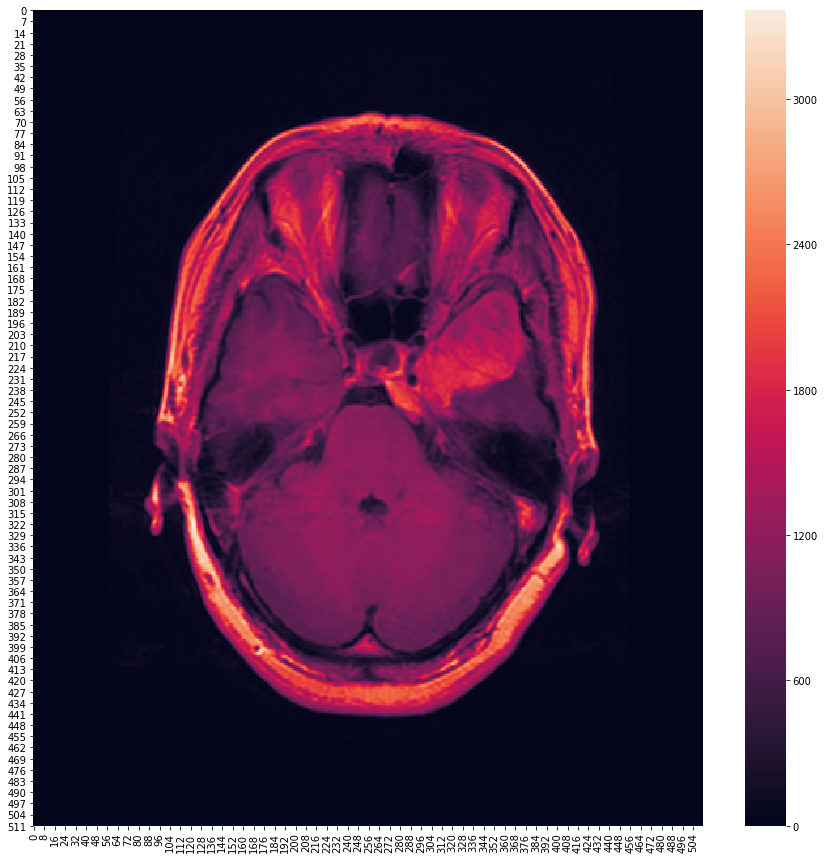

In [43]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(patient.image)

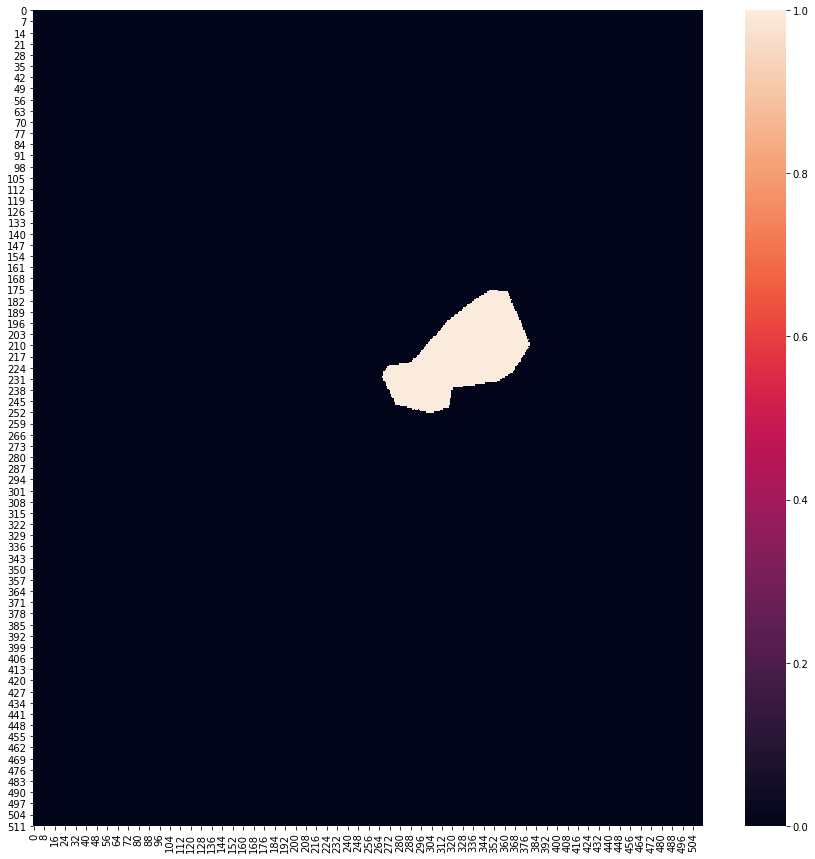

In [62]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(patient.tumorMask);